In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
import re


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/bank-marketing-uci/bank.csv')
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


Cleaning data

In [5]:

colmns = re.sub(";", " ", df.columns[0])
colmns = re.sub("\"", "", colmns)
colmns = colmns.split()

def clean_data(row):
    row = re.sub(";", " ", row)
    row = re.sub("\"", "", row)
    row = row.split()
    return row

data1 = df.copy()
data1.iloc[:,0] = data1.iloc[:,0].map(lambda x: clean_data(x))
data1

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"[30, unemployed, married, primary, no, 1787, n..."
1,"[33, services, married, secondary, no, 4789, y..."
2,"[35, management, single, tertiary, no, 1350, y..."
3,"[30, management, married, tertiary, no, 1476, ..."
4,"[59, blue-collar, married, secondary, no, 0, y..."
...,...
4516,"[33, services, married, secondary, no, -333, y..."
4517,"[57, self-employed, married, tertiary, yes, -3..."
4518,"[57, technician, married, secondary, no, 295, ..."
4519,"[28, blue-collar, married, secondary, no, 1137..."


In [6]:
idx = 0
for row in data1.iloc[:,0]:
    if len(row) == 17:
        i = 0
        for col in colmns:
            data1.loc[idx,col] = row[i]
            i += 1
    idx += 1
    
data1.drop(data1.columns[0], axis=1, inplace=True)
df = data1.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Plotting the distributions of the numerical columns to get a clearer picture of the data

ValueError: ignored

<Figure size 432x288 with 0 Axes>

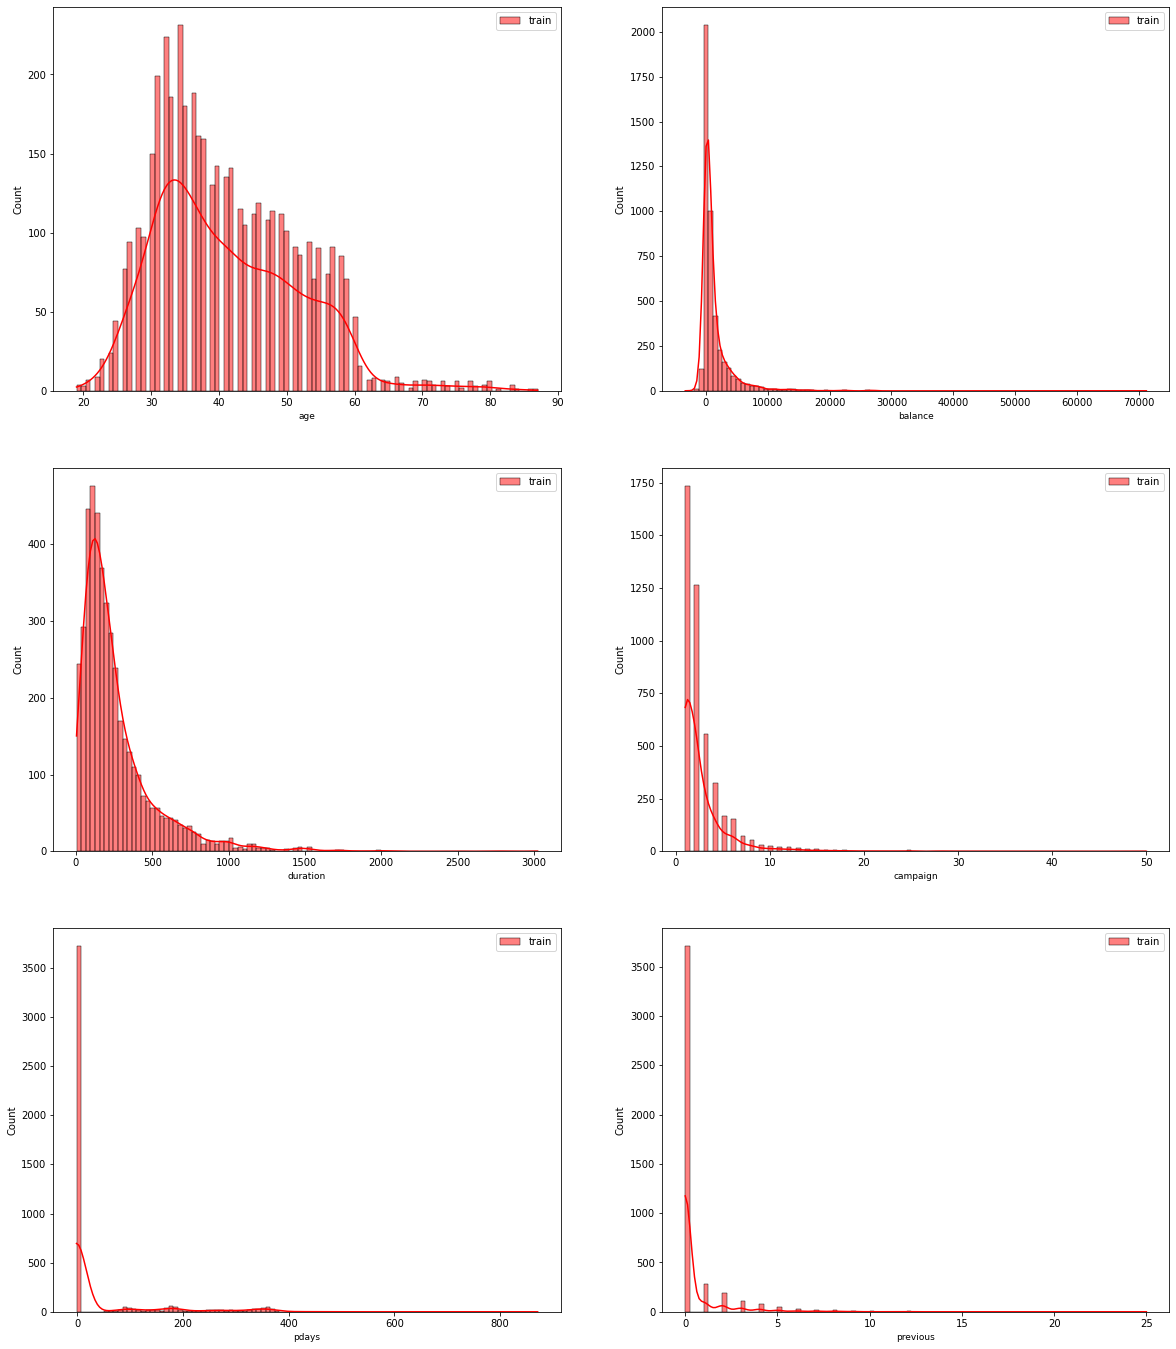

In [33]:
i = 1
plt.figure()
fig, ax = plt.subplots(3, 2,figsize=(20, 24))
for feature in numerical_cols:
    plt.subplot(3, 2,i)
    sns.histplot(df[feature],color="red", kde=True,bins=100, label='train')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()


Converting the data-type of several features to pass onto our model

In [7]:
convert_dtype = {"age":int, "balance":int, "day":int, "duration":int, "campaign":int, "pdays":int, "previous":int}
df = df.astype(convert_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Plotting the unique values of all categorical columns

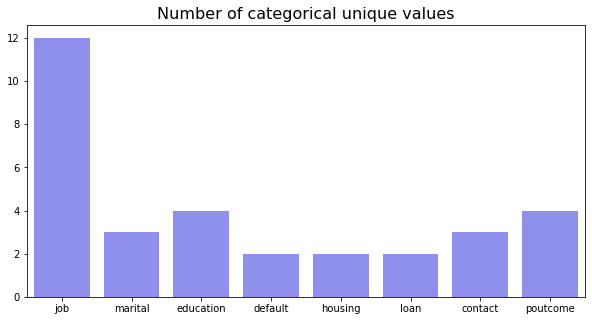

In [34]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=df[categorical_cols].nunique().values, x=df[categorical_cols].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

Converting values of month column manually

In [8]:
df["y"] = df["y"].map(lambda x: 1 if x=="yes" else 0)


months = {"jan":0, "feb":31, "mar":59, "apr":90, "may":120, "jun":151, "jul":181, "aug":212, "sep":243, "oct":273, "nov":304, "dec":334}
df["month"] = df["month"].map(lambda x: months[x])
df["day_of_year"] = df["day"] + df["month"]
df.drop(["month","day"], axis=1, inplace=True)

df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,14]]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,292,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,131,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,106,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,154,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,125,0


In [9]:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
numerical_cols = [col for col in df.columns if df[col].dtype != "O"]


df.loc[:,numerical_cols].describe()

,age,balance,duration,campaign,pdays,previous,day_of_year,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579,171.959965,0.115240
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562,73.535046,0.319347
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000,7.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000,131.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000,156.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000,217.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000,365.000000,1.000000


Checking for null or missing values

In [10]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
day_of_year    0
y              0
dtype: int64

Encoding our data so that our categorical columns can be passed to our model

In [11]:
from category_encoders.count import CountEncoder

In [12]:

col_to_transform = [col for col in categorical_cols if col != "day_of_year" and col != "y"]

CEnc = CountEncoder(cols=col_to_transform, normalize=True)
transformed_data = CEnc.fit_transform(X=df)

transformed_data


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,0.028312,0.618668,0.149967,0.98319,1787,0.433975,0.847158,0.640566,79,1,-1,0,0.819509,292,0
1,33,0.092236,0.618668,0.510064,0.98319,4789,0.566025,0.152842,0.640566,220,1,339,4,0.108383,131,0
2,35,0.214333,0.264543,0.298607,0.98319,1350,0.566025,0.847158,0.640566,185,1,330,1,0.108383,106,0
3,30,0.214333,0.618668,0.298607,0.98319,1476,0.566025,0.152842,0.292856,199,4,-1,0,0.819509,154,0
4,59,0.209246,0.618668,0.510064,0.98319,0,0.566025,0.847158,0.292856,226,1,-1,0,0.819509,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.618668,0.510064,0.98319,-333,0.566025,0.847158,0.640566,329,5,-1,0,0.819509,211,0
4517,57,0.040478,0.618668,0.298607,0.01681,-3313,0.566025,0.152842,0.292856,153,1,-1,0,0.819509,129,0
4518,57,0.169874,0.618668,0.510064,0.98319,295,0.433975,0.847158,0.640566,151,11,-1,0,0.819509,231,0
4519,28,0.209246,0.618668,0.510064,0.98319,1137,0.433975,0.847158,0.640566,129,4,211,3,0.043574,37,0


In [13]:
# transformed_data.drop(['y'], axis=1, inplace = True)
# transformed_data

Splitting our model into training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_data.iloc[:,:-1], transformed_data.iloc[:,-1], 
                                                    test_size=0.2, stratify=transformed_data.iloc[:,-1])

Decision tree classifier

In [15]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       801
           1       0.41      0.43      0.42       104

    accuracy                           0.86       905
   macro avg       0.67      0.68      0.67       905
weighted avg       0.87      0.86      0.86       905



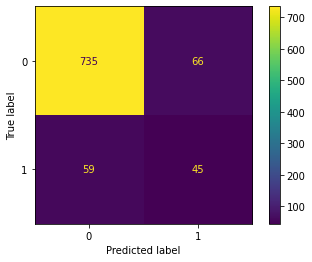

In [30]:
cm=confusion_matrix(Y_test,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Random Forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
res = RF.predict(X_test)
print(classification_report(Y_test, res))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       801
           1       0.59      0.22      0.32       104

    accuracy                           0.89       905
   macro avg       0.75      0.60      0.63       905
weighted avg       0.87      0.89      0.87       905



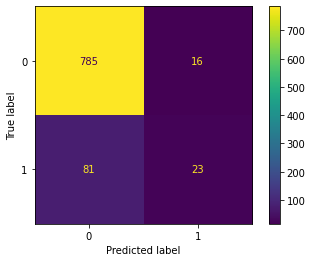

In [31]:
cm=confusion_matrix(Y_test,res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Logistic Regression

In [18]:
lr=LogisticRegression(random_state=42,solver='liblinear')
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print(classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       801
           1       0.62      0.22      0.33       104

    accuracy                           0.90       905
   macro avg       0.76      0.60      0.63       905
weighted avg       0.87      0.90      0.87       905



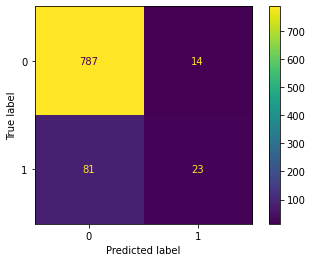

In [20]:
cm=confusion_matrix(Y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

SVM

In [21]:
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.transform(X_test)

In [22]:
svm_s=SVC(random_state=42)
svm_s.fit(X_train_s,Y_train)
y_pred_svm_s=svm_s.predict(X_test_s)
print(classification_report(Y_test,y_pred_svm_s))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       801
           1       0.78      0.13      0.23       104

    accuracy                           0.90       905
   macro avg       0.84      0.56      0.59       905
weighted avg       0.88      0.90      0.86       905



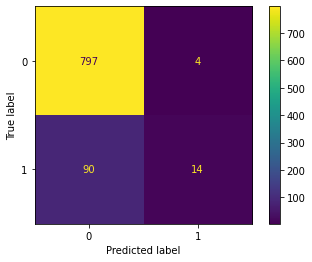

In [24]:
cm=confusion_matrix(Y_test,y_pred_svm_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [26]:
error=[]
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_s,Y_train)
  y_pred_knn=knn.predict(X_test_s)
  error.append((i,1-accuracy_score(Y_test,y_pred_knn)))

error_df=pd.DataFrame(error,columns=['K','Error'])
error_df

,K,Error
0,1,0.131492
1,2,0.122652
2,3,0.132597
3,4,0.117127
4,5,0.124862
5,6,0.118232
6,7,0.119337
7,8,0.114917
8,9,0.116022
9,10,0.109392


K Nearest Neighbours

In [28]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_s,Y_train)
y_pred_knn=knn.predict(X_test_s)
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       801
           1       0.41      0.15      0.22       104

    accuracy                           0.88       905
   macro avg       0.65      0.56      0.58       905
weighted avg       0.84      0.88      0.85       905



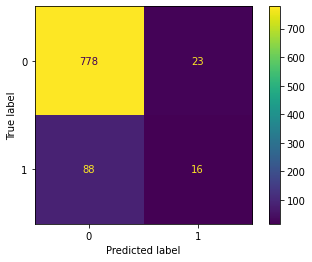

In [29]:
cm=confusion_matrix(Y_test,y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

XG Boost classifier

In [36]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth = 1, 
                            n_estimators = 100,
                              scale_pos_weight=5)
xgb_model.fit(X_train, Y_train)

XGBClassifier(learning_rate=0.001, max_depth=1, scale_pos_weight=5)

In [37]:
xgb_predict=xgb_model.predict(X_test)
xgb_predict

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [38]:
print(confusion_matrix(Y_test,xgb_predict))
print(classification_report(Y_test,xgb_predict))

[[492 309]
 [ 15  89]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75       801
           1       0.22      0.86      0.35       104

    accuracy                           0.64       905
   macro avg       0.60      0.74      0.55       905
weighted avg       0.88      0.64      0.71       905



FINAL MODEL USED: Logstic Regression / Random Forest Classifier

We use the following models as they give best results based upon given metrics i.e. f1 score, accuracy.